In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글처리
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

# 음수 - 표시 처리
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

In [76]:
from sklearn.datasets import load_breast_cancer, load_boston, load_iris

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

# 1. 샘플 소개

+ pip install mglearn

In [3]:
import mglearn

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


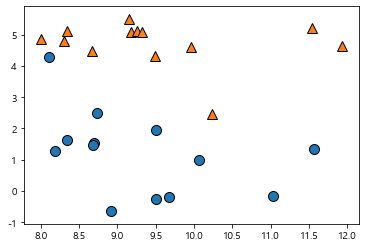

In [6]:
##### 이진 분류용 데이터 셋

X, y = mglearn.datasets.make_forge()

print(X)
print(y)

mglearn.discrete_scatter(X[:, 0], X[:,1], y)

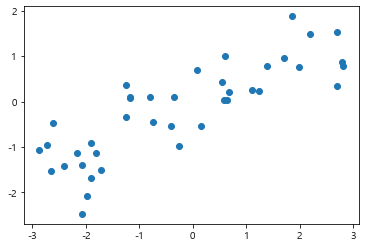

In [8]:
##### 선형 회귀용 데이터 셋

X, y = mglearn.datasets.make_wave(n_samples=40)

plt.plot(X, y, 'o')

In [18]:
##### 유방암 데이터 셋

cancer = load_breast_cancer()
#print(cancer)
print(cancer.keys())
print(cancer.target_names)
#print(cancer.DESCR)
print(cancer.feature_names)
print(cancer.data.shape)  # 데이터 갯수 , 변수 갯수

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30)


In [19]:
##### 보스턴 집값 데이터 셋

boston = load_boston()
print(boston.keys())
print(boston.data.shape)  # 데이터 갯수 , 변수 갯수

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)


# 2. 용어 정리

+ 훈련 결과에 따라

        (1) 과대 적합 ( 변수가 너무 많아서 데이터가 복잡해진 경우 )
            - 훈련 데이터셋의 각 샘플에 너무 가깝게 맞춰져 있어서 복잡한 모델을 만들게 되는 것
            
        (2) 과소 적합 ( 변수가 너무 적어서 데이터가 쓸모없어진 경우 )
            - 너무 간단한 모델이 선택되는 것
            
        (3) 일반화 ( 변수가 너무 많지 않고 너무 적지도 않은 적당한 상태 )
            - 처음 보는 데이터에 대해서 정확하게 예측할 수 있는 것

# 3. KNN (K-Nearst Neighbors) - 머신러닝에서 K는 n개의 의미

### (1) 특징
        - 이해하기 쉽고 직관적인 모델
        - 더 복잡한 알고리즘을 적용하기 전에 시도해 볼 수 있는 알고리즘
        - 훈련 데이터셋이 너무 크면 예측이 느려진다.

### (2) 파라미터 (하이퍼 파라미터)
        - 이웃의 갯수(K)
        - 데이터 사이의 거리 측정 방식 : L2norm

C:\Users\alcls\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


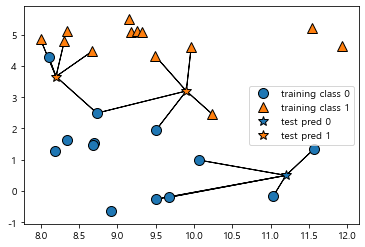

In [22]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

# 새로운 데이터가 입력되었을 때 가장 가까운 데이터의 타입에 따라서 타입을 분류, 예측
# (n_neighbors=3) 로 설정하면 가장 가까운 이웃(데이터) 3개에 따라서 다수결의 원칙에 의해 타입을 분류, 예측, 결정

### (2) L1 norm, L2 norm : 벡터의 크기 또는 길이를 측정

    1) L1 norm
        - 단순한 거리의 합
        - 맨하탄 거리
        
        
    2) L2 norm    ( 최단거리 구할 때 )
        - 거리의 절대값의 합에 루트를 적용
        - 피타고라서 정리, 유클리드 거리

In [24]:
df = pd.DataFrame(np.random.randint(1, 10, size=(3, 2)))
df.columns = ['x', 'y']
df

x  y
0  3  8
1  6  8
2  1  8

C:\Users\alcls\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


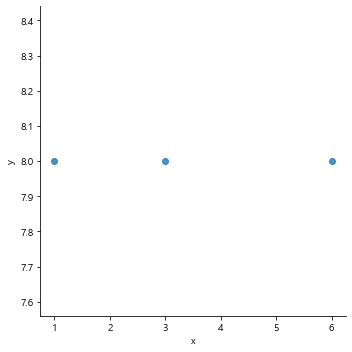

In [25]:
sns.lmplot('x', 'y', data=df, fit_reg=False)

In [27]:
##### (0, 0)으로부터 어디가 제일 가까울까 ?  -  L2 norm

np.linalg.norm(df.values, ord=2, axis=1)

# 순서는 위의 x,y 값 순서이며 각 점 중 어디가 제일 가까운 것은 배열속 숫자가 작은 순으로 가까움을 나타낸다.

array([ 8.54400375, 10.        ,  8.06225775])

In [30]:
df = pd.DataFrame(np.random.randint(-3, 3, size=(3, 3)))
df.columns = ["move1", "move2", "move3"]
df

move1  move2  move3
0     -2      2      0
1      1     -1      0
2     -3     -1     -3

In [31]:
##### 누가 가장 많이 걸었을까 ?  -  L1 norm

np.linalg.norm(df.values, ord=1, axis=1)

array([4., 2., 7.])

### (3) KNN 알고리즘 구현

In [20]:
X, y = mglearn.datasets.make_forge()
print(X.shape)   # 데이터수 : 26개,  변수 수 : 2개

(26, 2)


C:\Users\alcls\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19, 2) (7, 2) (19,) (7,)


In [26]:
clf = KNeighborsClassifier(n_neighbors=3)

# 우리가 직접 개입해서 성능을 조절하는 파라미터 => 하이퍼 파라미터 ,    여기서는 n_neighbors 가 해당 (이웃을 3개로 설정 - 결과변화)

In [27]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
clf.score(X_train, y_train)  #  훈련 성능확인 - 94%   , 훈련한 내용(X_train, y_train) 을 그대로 테스트하므로 결과가 높을수밖에..

1.0

In [17]:
clf.predict(X_test)   # 예측

array([1, 0, 1, 0, 1, 0, 0])

In [18]:
print(y_test)  # 정답

[1 0 1 0 1 1 0]


In [19]:
clf.score(X_test, y_test)  # 성능확인 - 85%   , 예측과 정답을 비교해서 성능확인

# 과적합은 실제훈련 받은 결과와 테스트의 결과가 차이가 너무 나는 것
# 훈련한 것을 테스트한 것은 94% 지만 실제 테스트 결과는 85% 임 = 이는 과적합에 해당
# fit = 훈련 , predict = 테스트 , score = 채점

0.8571428571428571

### (4) KNN 분석

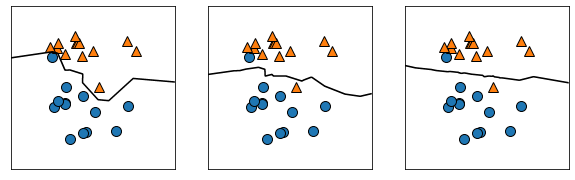

In [31]:
_, axes = plt.subplots(1, 3, figsize=(10, 3))     # 3개의 그래프 준비

clf = KNeighborsClassifier(n_neighbors=1).fit(X, y)
mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=axes[0])   # 첫번째 칸에 그래프를 그리겠다고 설정 , ax=axes[0]
mglearn.plots.plot_2d_separator(clf, X, ax=axes[0])

clf = KNeighborsClassifier(n_neighbors=3).fit(X, y)
mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=axes[1])   # 두번째 칸에 그래프를 그리겠다고 설정 , ax=axes[1]
mglearn.plots.plot_2d_separator(clf, X, ax=axes[1])

clf = KNeighborsClassifier(n_neighbors=9).fit(X, y)
mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=axes[2])   # 세번째 칸에 그래프를 그리겠다고 설정 , ax=axes[2]
mglearn.plots.plot_2d_separator(clf, X, ax=axes[2])

### 1) 유방암 데이터셋으로 확인

In [53]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426,) (143,)


In [54]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [55]:
clf.score(X_train, y_train)   # 이 결과는 훈련자료로 테스트 - 100%

0.9366197183098591

In [56]:
clf.score(X_test, y_test)    # 실제 시험결과는 92%  =  과적합이 있다. ( 훈련자료와 실제결과와 8%차이 - 이 차이를 줄여야한다.)

# KNN 에서 과적합을 줄이는 것은 이웃의 수 = 하이퍼 파라미터를 조절하는 방법 밖에 없음

0.9370629370629371

In [57]:
##### 가장 적합한 하이퍼 파라미터 선정

train_acc = []   #훈련정확도 저장
test_acc = []   #테스트정확도 저장

for n in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))
    

In [60]:
print(train_acc)
print(test_acc)

[1.0, 0.9530516431924883, 0.9460093896713615, 0.9413145539906104, 0.9389671361502347, 0.9366197183098591, 0.931924882629108, 0.931924882629108, 0.9366197183098591, 0.9389671361502347]
[0.9230769230769231, 0.9090909090909091, 0.9230769230769231, 0.9020979020979021, 0.9370629370629371, 0.9370629370629371, 0.9300699300699301, 0.9370629370629371, 0.9230769230769231, 0.9230769230769231]


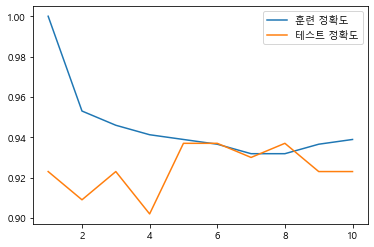

In [64]:
plt.plot(range(1, 11), train_acc, label="훈련 정확도")   # 훈련결과 (파랑)
plt.plot(range(1, 11), test_acc, label="테스트 정확도")   # 테스트결과 (주황)
plt.legend()

# 훈련데이터와 테스트데이터가 맞아 떨어지는 경우가 6

In [65]:
test_acc[5]      # 6의 값이 인덱스로 5번

0.9370629370629371

### (5) 회귀분석을 위한 KNN

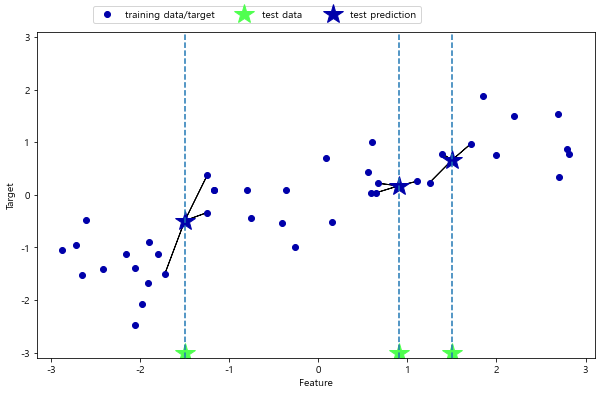

In [66]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [67]:
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(30, 1) (10, 1) (30,) (10,)


In [69]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

In [72]:
print("설명계수(R^2) : ", reg.score(X_test, y_test))     # 83% 를 의미하는게 아님

설명계수(R^2) :  0.8344172446249605


In [73]:
X_test, y_test

(array([[-1.24713211],
        [ 0.67111737],
        [ 1.71105577],
        [-2.06388816],
        [-2.87649303],
        [-1.89957294],
        [ 0.55448741],
        [ 2.81945911],
        [-0.40832989],
        [-2.72129752]]),
 array([ 0.37299129,  0.21778193,  0.96695428, -1.38773632, -1.05979555,
        -0.90496988,  0.43655826,  0.7789638 , -0.54114599, -0.95652133]))

In [74]:
reg.predict(X_test)   # 대답한 값

# 설명력(설명계수) 이란,  y_test(실제값) 과 reg.predict(X_test) - (대답한 값)의 비교했을 때 근사치들이 많으냐 적으냐를 나타낸것

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

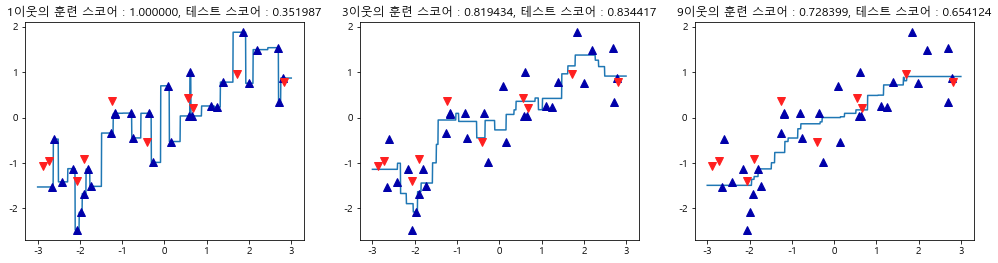

In [75]:
fig, axes = plt.subplots(1, 3, figsize=(17, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{0}이웃의 훈련 스코어 : {1:2f}, 테스트 스코어 : {2:2f}".format(n, 
                                                                   reg.score(X_train, y_train),
                                                                  reg.score(X_test, y_test)))


### (6) 붓꽃 데이터를 이용한 응용 예제

In [79]:
iris = load_iris()
print(iris.keys())
print(iris.target_names)   # 정답에 해당하는 이름
print(iris.feature_names)   # 변수명

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [80]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

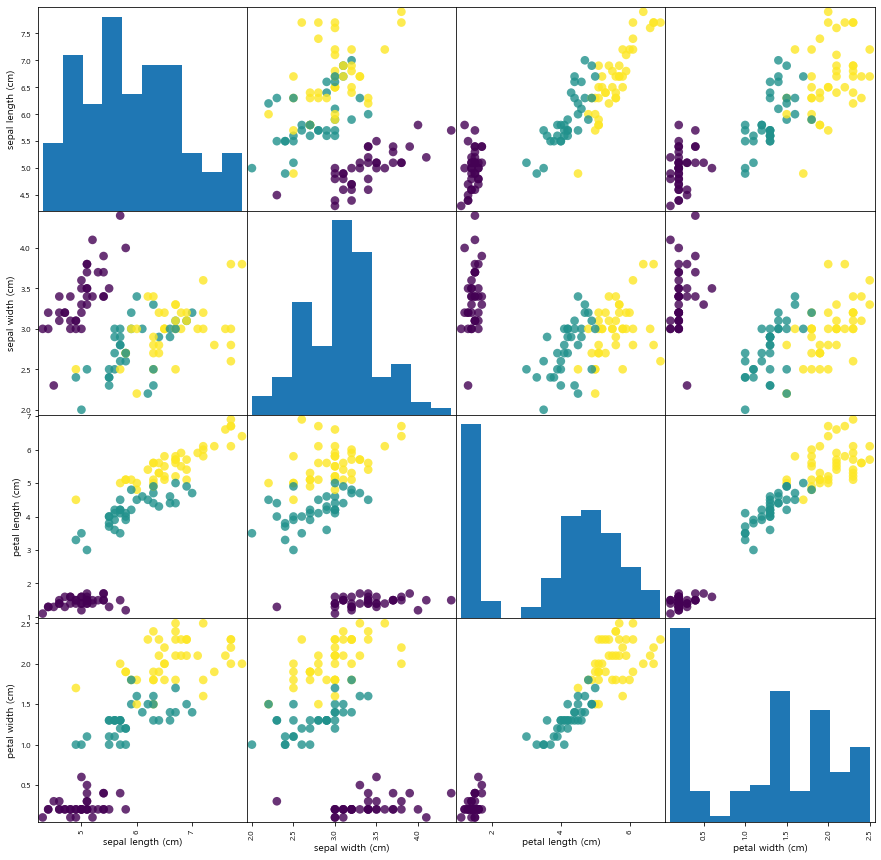

In [88]:
##### 그래프로 시각화

iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
iris_df

pd.plotting.scatter_matrix(iris_df, figsize=(15, 15), c=y_train, s=300, alpha=0.8)

In [89]:
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

In [90]:
print(clf.score(X_test, y_test))     # score 함수는 테스트하고 몇점을 맞았는지 채점까지 해주는 기능

0.9736842105263158


In [93]:
pred = clf.predict(X_test)   # score 함수를 풀어서...
np.mean(pred == y_test)

0.9736842105263158

In [96]:
# 꽃받침(Sepal)의 길이가 5cm, 폭은 2.9cm, 꽃잎(Petal)의 길이는 1cm, 폭은 0.2cm 인 붓꽃의 품종은 ?

s_h = 5.0
s_w = 2.9
p_h = 1.0
p_w = 0.2

pred = clf.predict([[5.0, 2.9, 1.0, 0.2]])
print("붓꽃의 품종은 ", iris.target_names[pred] , "입니다")

붓꽃의 품종은  ['setosa'] 입니다


### (7) 직접 KNN 알고리즘 만들기

+ 영화 분류 프로그램

In [138]:
def createDataSet():
    train = np.array([[1.0, 2.0], [1.0, 4.0], [4.0, 1.0], [4.0, 2.0]])
    label = ["Action", "Action", "Romance", "Romance"]
    return train, label

def calcDistance(X_new, data):
    dataSize = len(data)   # data.shape[0]
    diffMat = np.tile(X_new, (4, 1)) - data  # 새로운 데이터 X_new 와 기존데이터 data 의 차이를 구해야 거리를 알 수 있으므로...기존 data는 train 의미
    
    sqDiffMath = diffMat**2
    distance = (sqDiffMath.sum(axis=1))**0.5
    return distance.argsort()

import operator
def findMajorityClass(sortedDistance, target, k):
    classCount = {}
    
    for i in range(k):
        voteLabel = target[sortedDistance[i]]
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1    # key는 Action 이라는 키가 {Action} 만들어짐
    
    return sorted(classCount.items(), key=operator.itemgetter(1))  # 값이 1인 것을 key로 사용하겠다 = key=operator.itemgetter(1)

def classify(X_new, data, target, k):
    # 거리 측정
    sortedDistance = calcDistance(X_new, data)
    
    # 이웃의 개수로 묶어 해당 클래스로 분류
    result = findMajorityClass(sortedDistance, target, k)
    return result

In [143]:
X, y = createDataSet()
result = classify([2.0, 3.0], X, y, 3)  # 내가 입력한 2.0, 3.0 이 Action영화인지 Romance 영화인지 알려주는 함수
print("결과는 {} 영화이다.".format(result[0][0]))

결과는 Romance 영화이다.
